# Enumerations

In computer programming, an enumeration is a special datatype used to represent one of a multiple possible, but finite, amount of choices.

If you were to represent an enumeration as a graphical user interface (GUI) element, it might look like a drop-down list:
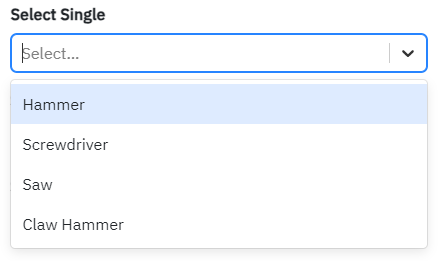

## Motivation

Say you had a finite element analysis (FEA) software that had multiple different kinds of solvers:

* Fast linear solver
* Detailed linear solver (will report on where instabilities exist)
* Iterative solver (for non-linear analysis, etc.)

Your user needs to choose which solver to use when they perform the analysis. How will they tell you which solver to use? In other words, what data type will you choose to represent the different solver choices?

### Datatype options

#### `str`
Using a `str` you could write some logic to read strings like the following `fast-linear`, `detailed-linear`, `iterative`. 
* Pros: Easy to use, easy to understand (the data itself is descriptive)
* Cons: Have to do string reading and error handling if the strings are not 100% correct (e.g. `"Fast-Linear"` vs `"fast-linear"`)

#### `int`
Using an integer, you could write some logic to take different actions based on the value of the integer. _In the documentation_, you would have to tell the user that, say, `1` is for fast linear, `2` is for detailed linear, `3` is for iterative.
* Pros: No parsing is needed, easy to check for correct values (`1 <= x <= 4`). Unambiguous.
* Cons: Not descriptive, you have to look up the values in a table in the docs.

### Using an enumeration is the best of both worlds: unambiguous and descriptive

Here is an example of what an enumeration in Python looks like:

```python
from enum import Enum

class SolverType(Enum):
    FAST_LINEAR = 1
    DETAILED_LINEAR = 2
    ITERATIVE = 3

print(SolverType(1))
print(SolverType(2))
print(SolverType(3))
```

We can use `Enum` objects directly (without having to instantiate them):

```python
SolverType.FAST_LINEAR
SolverType(1) == SolverType.FAST_LINEAR
```

There is also another type of Enum in Python:

```python
from enum import IntEnum

class SolverType(IntEnum):
    FAST_LINEAR = 1
    DETAILED_LINEAR = 2
    ITERATIVE = 3
```

Everything about this `IntEnum` is the same as `Enum` with the one extra super-power being that the Enum is equal to its integer:

```python
print(SolverType.FAST_LINEAR == 1)
```


## We can make the enumerations available to the user to use directly

Say we wanted to do the analysis of an FE model and we needed the user to specify which solver they want to use. They can now do it like this (assuming that all of these objects are in a library called `fesolver` or something...I just made that up).

```python
from fesolver import Model, SolverType

model = Model(...) # user makes the model here...
...

model.analyze(solver=SolverType.ITERATIVE)
```

The function will check the `solver` parameter to see if it is one of the three `SolverType`s and will act accordingly. The check is one unambiguous `if` statement: `if solver == SolverType.ITERATIVE:`. No need to do any string parsing to make sure that it is, say, all upper case and does not have any mis-spellings.

Alternatively, the user could also do this:

```python
model.analyze(solver=SolverType(3))
```

And since `SolverType(3) == SolverType.ITERATIVE` then it works the exact same.

## Enumerations in the CSi OAPI

In all of the CSi applications, enumerations are EVERYWHERE. Depending on which interface you are using, you can use them either one way or two ways.

### COM interface
If you are using the COM interface, you can simply use the corresponding integer whenever a function is asking for a specific enum. The enum integer values will be in the function's documentation.

### Python.NET interface
If you are using the Python.NET interface, then you MUST use the actual enum type provided by CSi whenever a function parameter requires it.

## Example

In the function `SapObject.SapModel.Results.FrameForce` we can see this documentation:

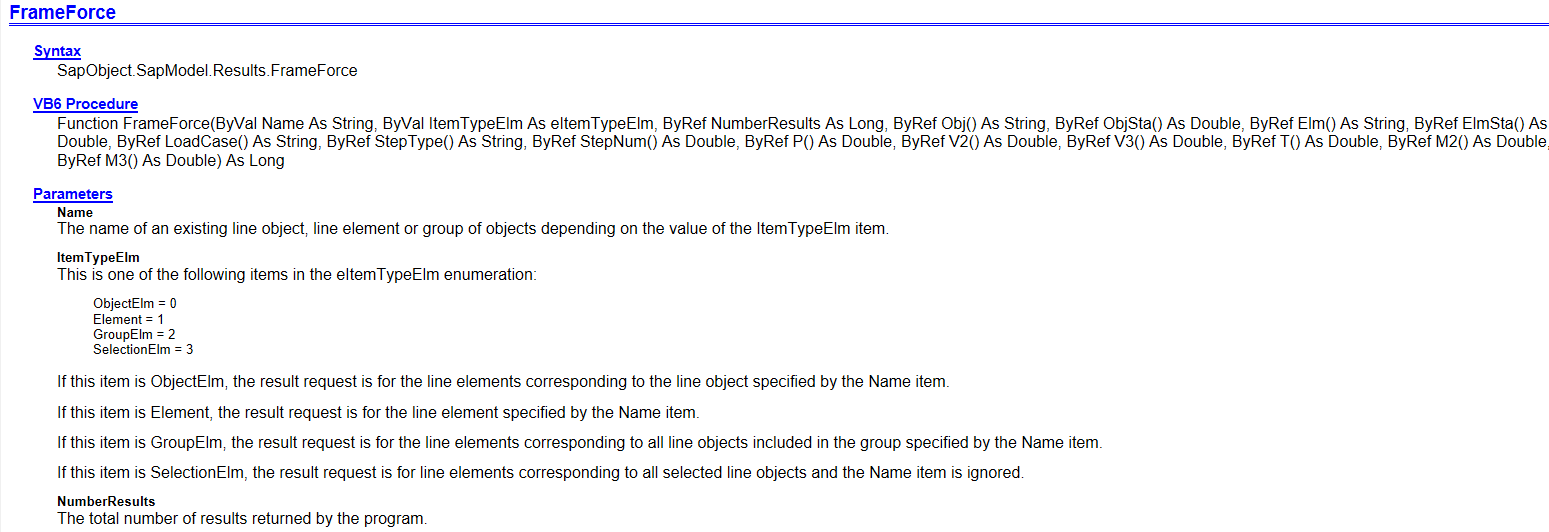

Here, we can see that the second parameter `ItemTypeElm` as of type `eItemTypeElm`. 

The `e` at the beginning tells us that this is an enumeration. The documentation tells what each what each of the enum options are and how they are encoded as an `int`. With **COM**, we can use the `int` value directly (nice and easy). With **Python.NET**, we need to use the actual enum.

We get the enum from the top-level SAP2000 namespace (the one where the `Helper` object resides). See the [Python.NET notebook](Python.Net.ipynb) for specifics on this.

```python
... # Previous code here
clr.AddReference(r'C:\Program Files\Computersand Structures\SAP2000 25\SAP2000v1.dll')

import SAP2000v1 as sap_namespace

ItemTypeElem = sap_namespace.eItemTypeElem

... # Get the SapObject and SapModel
# Build a model and analyze it

sap_model.Results.FrameForce("M0", ItemTypeElem(0), NumberResults=0, [], [], [], [], ...) # Use the ItemTypeElem to make a choice on which option you want
```